In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('20180924-FullFatDesign.csv')

def calc(v2, concs, power):
    x = np.linspace(0,1, concs)
    x = np.power(x,power)
    x = x/x.max()*500   #normalize from 0-1, multiply by 200 =(500/2.5)
    x = pd.DataFrame(x) #conc in µM
    v1 =(v2*x)/10 # nl
    v1 = np.ceil(v1/2.5)*2.5
    return v1


alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

layout = pd.DataFrame([i + str(j) for j in range(1,25) for i in alphabet], columns = ['Well'])

reps = 5
newdata = pd.DataFrame()

for i in range(0, reps):
    newdata = newdata.append(data)
newdata = newdata.sort_values(['Vol/µl','Prot]/µM']) #make version of data with replicates


temp = pd.DataFrame() # temporary thing
newdata = newdata.reset_index() #yeeeeeeaap

for i in range(0,len(newdata)): ##replicate each experimental run by number of concentrations
    for j in range(0,newdata.loc[i,'No. Concs']):
        temp = temp.append([newdata.loc[i]])

        
temp = temp.reset_index().drop(['index','level_0'],
                              axis = 1)
temp = temp.sort_values(['Vol/µl','Prot]/µM']).drop(['Pattern', 'Block','StDev'],
           axis = 1)

Vols = pd.Series(name = 'Volumes')

for i in range(0,len(newdata)):
    v2 = (newdata.loc[i]['Vol/µl'])
    concs = (newdata.loc[i]['No. Concs'])
    power = (newdata.loc[i]['Power'])
    vols = calc(v2, concs, power)
    Vols = Vols.append(vols)
    
Vols.columns = ['Substreate/nl']
Vols = Vols.reset_index(drop = True)

temp = pd.concat([temp, Vols],
         axis = 1,
         join = 'inner')

In [6]:
plate1 = temp.loc[0:359].append(pd.DataFrame(np.zeros(shape = (24,5)),
                          columns = temp.columns),
             ignore_index  = True)
plate2 = temp.loc[360:719].append(pd.DataFrame(np.zeros(shape = (24,5)),
                          columns = temp.columns),
             ignore_index  = True)
plate3 = temp.loc[720:].append(pd.DataFrame(np.zeros(shape = (24,5)),
                          columns = temp.columns),
             ignore_index  = True)

plate1.to_csv('384plate1.csv')
plate2.to_csv('384plate2.csv')
plate3.to_csv('384plate3.csv')

<Figure size 432x288 with 0 Axes>

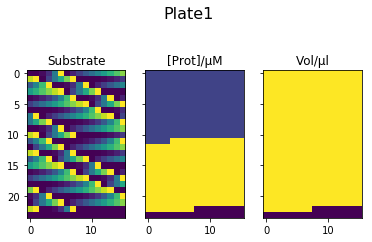

In [7]:
plt.set_cmap('viridis')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

maparr = []
for i in plate1['Substreate/nl']:
    maparr = np.append(maparr, i)
ax1.imshow(maparr.reshape(24,16))
ax1.set_title('Substrate')

#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in plate1['Prot]/µM']:
    maparr = np.append(maparr, i)
ax2.imshow(maparr.reshape(24,16))
ax2.set_title('[Prot]/µM')
#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in plate1['Vol/µl']:
    maparr = np.append(maparr, i)
ax3.imshow(maparr.reshape(24,16))
ax3.set_title('Vol/µl')
#plt.colorbar(label = 'Vol/µl')
f.suptitle('Plate1', fontsize=16)

plt.show()

<Figure size 432x288 with 0 Axes>

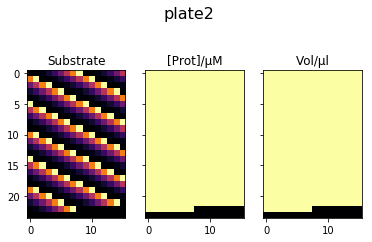

In [4]:
plt.set_cmap('inferno')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

maparr = []
for i in plate2['Substreate/nl']:
    maparr = np.append(maparr, i)
ax1.imshow(maparr.reshape(24,16))
ax1.set_title('Substrate')

#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in plate2['Prot]/µM']:
    maparr = np.append(maparr, i)
ax2.imshow(maparr.reshape(24,16))
ax2.set_title('[Prot]/µM')
#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in plate2['Vol/µl']:
    maparr = np.append(maparr, i)
ax3.imshow(maparr.reshape(24,16))
ax3.set_title('Vol/µl')
#plt.colorbar(label = 'Vol/µl')
f.suptitle('plate2', fontsize=16)

plt.show()

<Figure size 432x288 with 0 Axes>

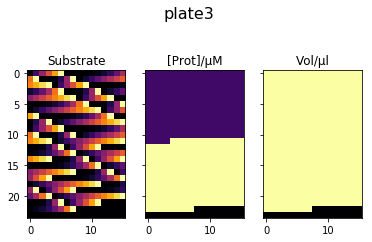

In [5]:
plt.set_cmap('inferno')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

maparr = []
for i in plate3['Substreate/nl']:
    maparr = np.append(maparr, i)
ax1.imshow(maparr.reshape(24,16))
ax1.set_title('Substrate')

#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in plate3['Prot]/µM']:
    maparr = np.append(maparr, i)
ax2.imshow(maparr.reshape(24,16))
ax2.set_title('[Prot]/µM')
#ax1.colorbar(label = 'Vol Substrate/nl')

maparr = []
for i in plate3['Vol/µl']:
    maparr = np.append(maparr, i)
ax3.imshow(maparr.reshape(24,16))
ax3.set_title('Vol/µl')
#plt.colorbar(label = 'Vol/µl')
f.suptitle('plate3', fontsize=16)

plt.show()

In [170]:
platex = pd.concat([layout, plate3],
         axis = 1,
         join = 'inner')

nums = platex['Well'].str.split('([A-z]+)', expand=True)

nums[1] = pd.DataFrame([alphabet.index[alphabet[0]==i].values for i in nums[1]])
nums[2] = nums[2].astype(int)

nums['position'] = nums[1]*24 + nums[2]

text = ['<?xml version="1.0"?>',
       '<TransferPlate>']
arr=[]
arr = ['<Transfer SrcID= "'+'1'+'" DestID="'+ str(nums['position'][i]) +'" Volume="'+str(platex['Substreate/nl'][i])  +'" />' for i in range(0,len(platex))]

arr.append('</TransferPlate>')
xml1 = pd.DataFrame(text).append(pd.DataFrame(arr))

outfile = open('plate3.xml', 'w')

for i in text:
    outfile.write(i)
for i in arr:
    outfile.write(i)
outfile.close()

"\nfile = open('20180925_echo384_plate3.txt','w') \n\nfor i in xml1:\n    \n    print(str(xml1.loc[:,i].values))\n    file.write(str(xml1.loc[:,i].values)) \n\n \nfile.close() "

In [190]:
((sum(temp['Substreate/nl'])/1000)+98.8)/50

15.238999999999999